In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
adata = sc.read('./../data/processed/adata_annotated.h5ad')

In [3]:
adata_ = sc.read('./../data/processed/data_norm.h5ad')

In [4]:
adata_.obs = adata.obs

In [5]:
adata.obs.columns

Index(['G2M_score', 'S_score', 'adult_stress', 'baseline', 'batch',
       'condition', 'log_counts', 'louvain', 'louvain_high_res', 'mt_fraction',
       'n_counts', 'n_genes', 'phase', 'sample_id', 'sample_name',
       'size_factors', 'umap_density_adult_stress'],
      dtype='object')

In [6]:
plt.rcParams['figure.dpi'] = 500

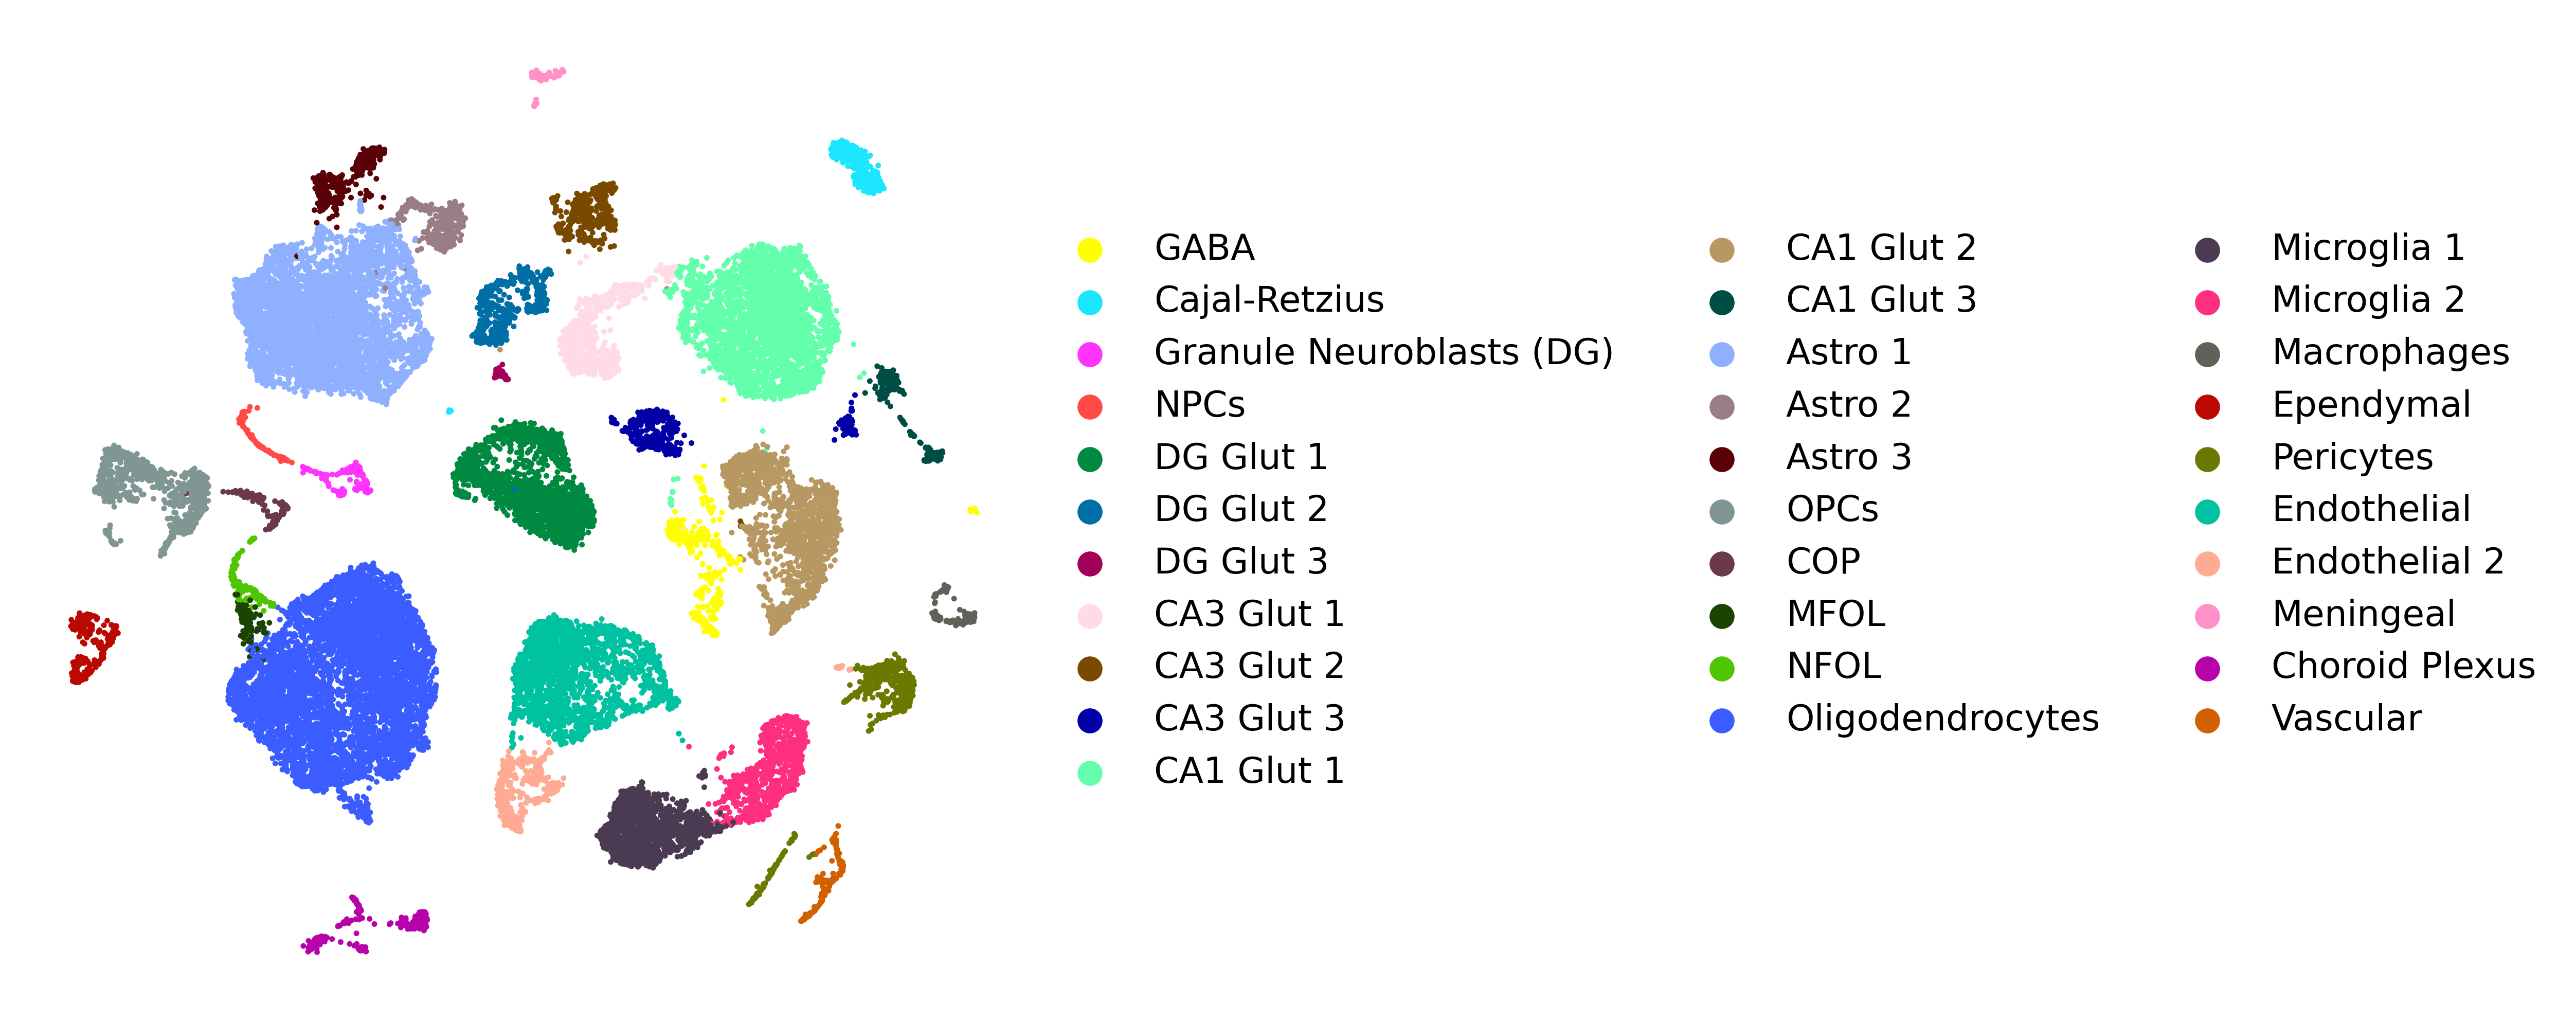

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(
    adata, 
    color='louvain', 
    frameon=False,
    show=False,
    ax=ax,
    size=10,
)
ax.set_title('')
fig.savefig('umap.png', dpi=600, bbox_inches='tight')

In [37]:
adata_raw = sc.AnnData(
    X=adata.raw.X,
    obs=adata.obs,
)
adata_raw.var_names = adata.raw.var_names

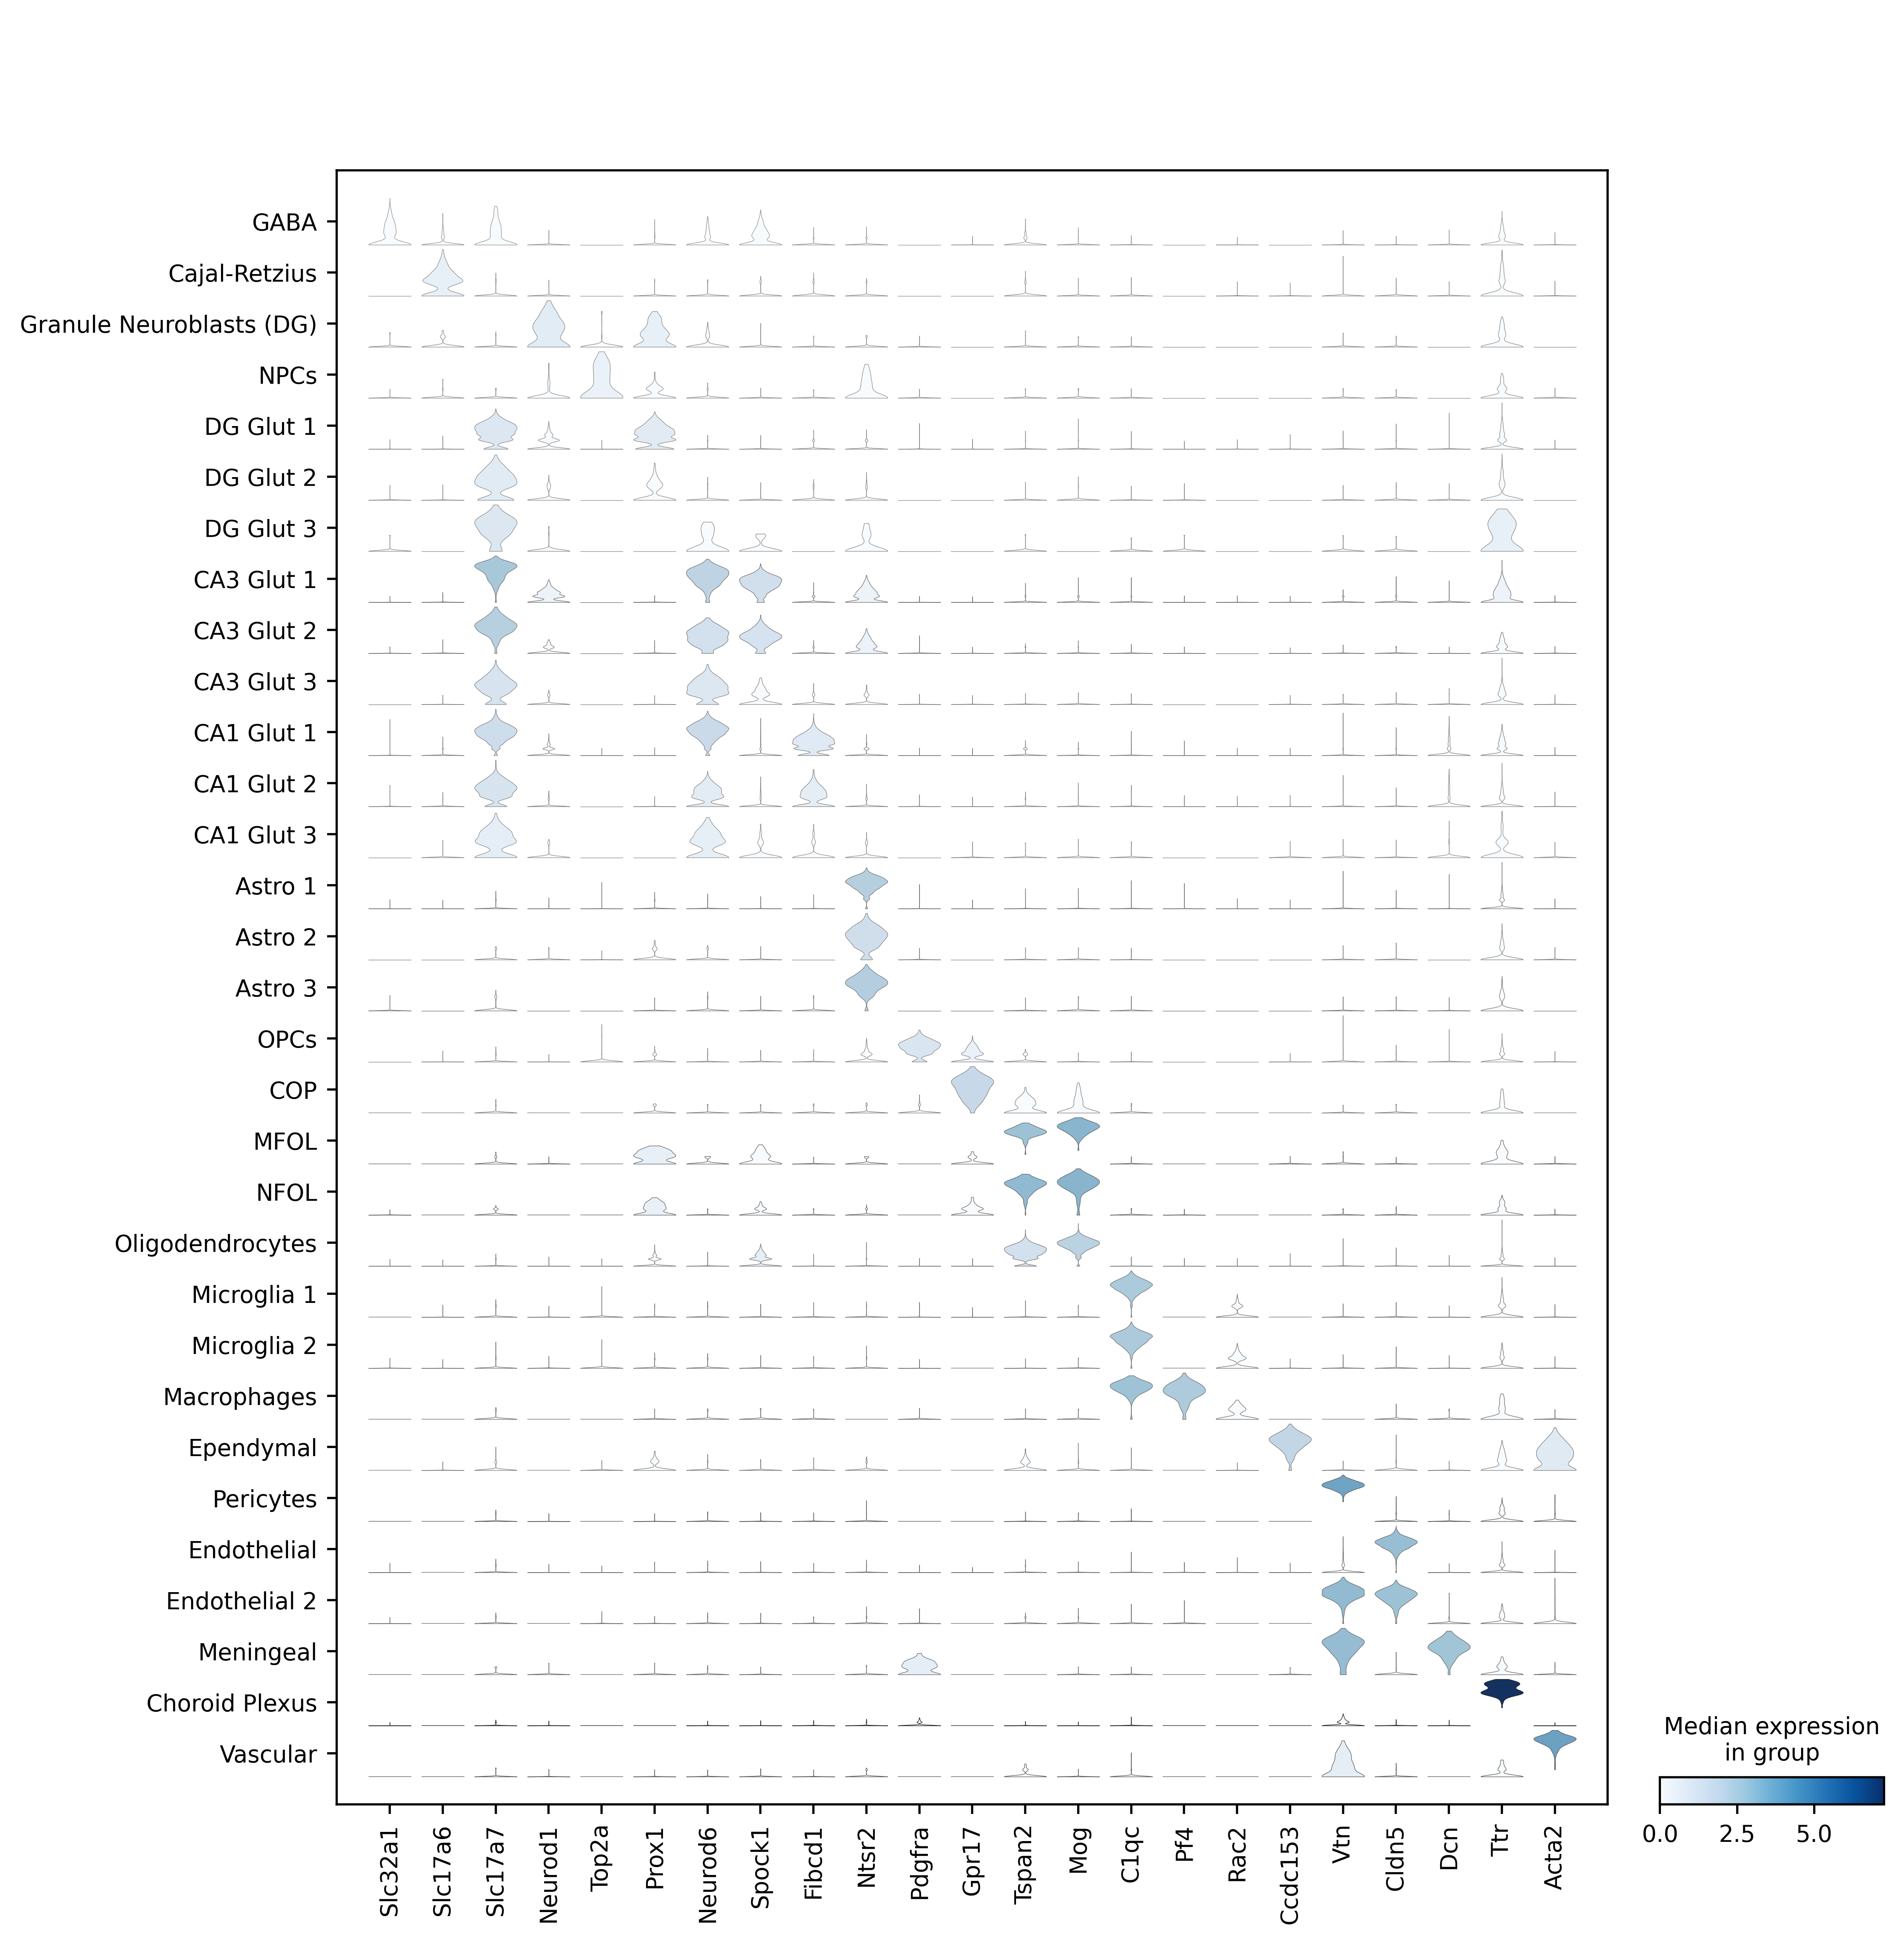

In [41]:
fig = sc.pl.stacked_violin(
    adata_raw,
    groupby='louvain',
    var_names=[
        'Slc32a1',
        'Slc17a6',
        'Slc17a7',
        'Neurod1',
        'Top2a',
        'Prox1',
        'Neurod6',
        'Spock1',
        'Fibcd1',
        'Ntsr2',
        'Pdgfra',
        'Gpr17',
        'Tspan2',
        'Mog',
        'C1qc',
        'Pf4',
        'Rac2',
        'Ccdc153',
        'Vtn',
        'Cldn5',
        'Dcn',
        'Ttr',
        'Acta2'
    ],
    return_fig=True
)
fig.savefig('markers.pdf')